In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy as stats
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
data=pd.read_excel('指数移动平均线.xlsx')
data=data[(data['date']>=20191001) & (data['date']<=20210501)]
df=data
#读取数据

In [3]:
ts=df['指数']  #时间序列的变量为"open"，并赋值给"ts "
ts.head()  #读出open的前5个数据

182    121.357987
183    123.047919
184    124.363053
185    124.059094
186    125.790607
Name: 指数, dtype: float64

Text(0, 0.5, '开盘价')

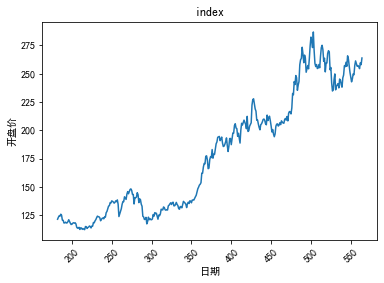

In [4]:
plt.rcParams['font.sans-serif'] = ['simhei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
ts.plot()
plt.title("index")  #添加图标题
plt.xticks(rotation=45)    #横坐标旋转45度
plt.xlabel('日期')   #添加图的标签（x轴，y轴）
plt.ylabel('开盘价')

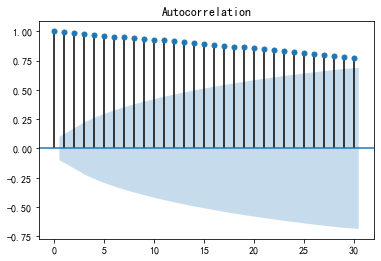

In [5]:
from statsmodels.graphics.tsaplots import plot_acf #导入自相关函数
plot_acf(ts,use_vlines=True,lags=30)  #"lags"自相关函数的滞后取值范围，此处之后30阶，绘制出原始数据"ts"的自相关图
plt.show()  #展示原始数据"ts"的自相关图

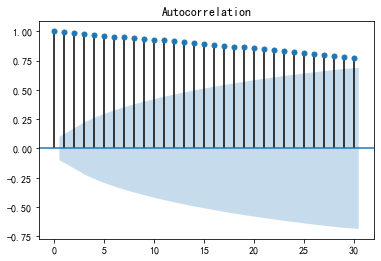

原始序列的ADF检验结果为： (-0.24474646201052938, 0.9329735120146871, 11, 371, {'1%': -3.4480996560263386, '5%': -2.8693621113224137, '10%': -2.570937038891028}, 2124.5621475452676)


In [6]:
from statsmodels.tsa.stattools import adfuller
#原始数据平稳性检测（单位根检验）
plot_acf(ts,use_vlines=True,lags=30)  #"lags"自相关函数的滞后取值范围，此处之后30阶，绘制出原始数据"ts"的自相关图
plt.show()  #展示原始数据"ts"的自相关图
print(u'原始序列的ADF检验结果为：', adfuller(df[u'指数'])) #展示单位根检验结果

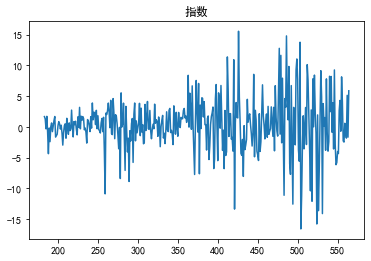

In [7]:
# 进行一阶差分
D_ts = ts.diff().dropna()   #对"ts数列"进行差分
# 绘制差分后时序图
D_ts.plot()  #绘制出差分后的时序图
plt.title("指数")  #添加图标题
plt.show()   #展示差分后的时序图

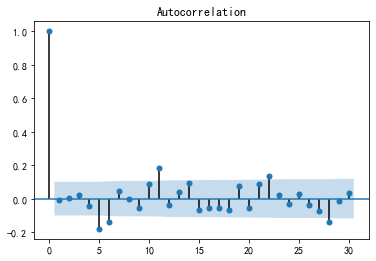

In [7]:
from statsmodels.graphics.tsaplots import plot_acf #导入自相关函数 # 绘制差分后自相关图与偏自相关图
plot_acf(D_ts,use_vlines=True,lags=30)  #"lags"自相关函数的滞后取值范围，此处之后30阶，绘制出原始数据"ts"的自相关图
plt.show() #展示差分后数据"D_ts"的自相关图

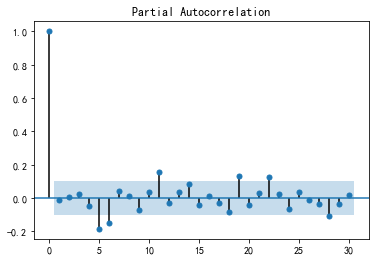

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf  #导入偏自相关函数
plot_pacf(D_ts,use_vlines=True,lags=30) #"lags"偏自相关函数的滞后取值范围，此处之后30阶，绘制出原始数据"ts"的自相关图
plt.show()  #展示差分后数据"D_ts"的偏自相关图

In [9]:
from statsmodels.tsa import stattools #对差分后达到平稳的数据进行白噪声检验
LjungBox=stattools.q_stat(stattools.acf(D_ts)[1:12],len(D_ts)) #展示白噪声检验结果，返回统计量和p值
LjungBox[1][-1]

F:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


4.952344700257435e-05

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts,order=(1,1,0))
result=model.fit(disp=-1)
result.summary()

F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.指数   No. Observations:                  382
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1108.185
Method:                       css-mle   S.D. of innovations              4.402
Date:                Sat, 29 May 2021   AIC                           2222.370
Time:                        10:06:37   BIC                           2234.206
Sample:                             1   HQIC                          2227.066
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3728      0.223      1.672      0.095      -0.064       0.810
ar.L1.D.指数    -0.0098      0.051     -0.191      0.848      -0.110       0.091
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -102.1119           +0.0000j          102.1119            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
result.conf_int()#模型诊断

,0,1
const,-0.064326,0.81002
ar.L1.D.指数,-0.110156,0.09057


In [12]:
sm.tsa.arma_order_select_ic(D_ts,max_ar=6,max_ma=4,ic='aic')['aic_min_order'] #AIC确定阶数
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts,order=(2,1,2))
result=model.fit(disp=-1)
result.summary()

F:\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
F:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.指数   No. Observations:                  382
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1104.318
Method:                       css-mle   S.D. of innovations              4.355
Date:                Sat, 29 May 2021   AIC                           2220.636
Time:                        10:06:58   BIC                           2244.308
Sample:                             1   HQIC                          2230.027
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3723      0.226      1.648      0.099      -0.070       0.815
ar.L1.D.指数     0.3328      0.047      7.067      0.000       0.241       0.425
ar.L2.D.指数    -0.9103      0.056    -16.313      0.000      -1.020      -0.801
ma.L1.D.指数    -0.3659      0.028    -13.050      0.000      -0.421      -0.311
ma.L2.D.指数     0.9651      0.039     24.764      0.000       0.889       1.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1828           -1.0321j            1.0481           -0.2221
AR.2            0.1828           +1.0321j            1.0481            0.2221
MA.1            0.1896           -1.0001j            1.0179           -0.2202
MA.2            0.1896           +1.0001j            1.0179            0.2202
-----------------------------------------------------------------------------
"""

In [13]:
result.conf_int()

,0,1
const,-0.070389,0.814979
ar.L1.D.指数,0.240520,0.425136
ar.L2.D.指数,-1.019629,-0.800898
ma.L1.D.指数,-0.420846,-0.310939
ma.L2.D.指数,0.888694,1.041460


In [14]:
result.forecast(5)[0]

array([263.94500939, 264.44129514, 265.10905089, 265.4668193 ,
       265.56533243])

In [15]:
true=pd.read_excel('指数移动平均线.xlsx')
true=true[(true['date']>=20210501)&(true['date']<=20210528)]['指数'].tolist()
predict=result.forecast(16)[0]

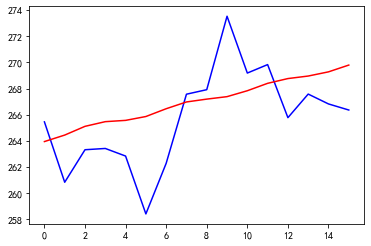

In [16]:
plt.plot(true,'b-')
plt.plot(predict,'r-')
plt.show()

In [17]:
arima_result=pd.DataFrame({
    '指数':result.forecast(90)[0]
})
arima_result.to_csv('ARIMA预测结果.csv',index=False)